
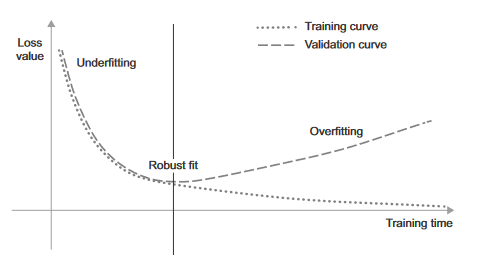


#Regularization Techniques

##Hold-Out Validation
Set apart some fraction of your data as test set. Train on remaining data, and evaluate on the test set.ù
Suffer if little data is available as validation and test may contain too few samples to be statistically representative of the data.

In [ ]:
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]
model=get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)
...

##K-Fold Validation
Split data into K partitions of equal size, for each partition i, train a model on the remaining K-1 partitions and evaluate it on partition i.
Final score is the averages of the K scores obtained.
Helpful when performance of your model shows variance based on train-test split.

In [ ]:
k = 3
num_validation_samples = len(data)//k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
  validation_data = data[num_validation_samples*fold:num_validation_samples*(fold+1)]
  training_data = np.concatenate(data[:num_validation_samples*fold],
                                 data[num_vaidation_samples * (fold+1):])
  model=get_model()
  model.fit(trainin_data,...)
  validation_score = model.evaluate(validation_data,...)
  validation_scores.append(validation_score)
validation_score = np.average(validation_scores)
model = get_model
model.fit(data,...)
test_score = model.evaluate(test_data,...)

##Iterated K-fold with shuffling
For situations in which you have little data and need to evaluate your model precisely.
(Helpful in kaggle competitions).
Consist in applying K-fold validation multiple times, shuffling the data every time before splitting it K ways. Final score is the average of the scores obtained at each run of K-fold validation.
Note: you end up training and evaluating P*K models (P is the number of iterations), very expensive.

#Improving Model Fit
To achieve perfect fit you must first overfit.
Three common problems:
1.   Training doesn't get started: training loss doesn't go down overtime.
2.   Training gets started but the model doesn't meaningfully generalize: Can't beat the common-sense baseline.
3.   Training and Validation loss both go down, and can beat the baseline, but you don't seem to be able to overfit, which indicates that you are still underfitting.



##Tuning key gradient descent paramenters
Sometimes your loss is stuck.
When this happens, it's always a problem with the configuration of the gradient descent process: choice of optimizer, distribution of initial values in the weights, learning rate or batch size.
Sufficient to tune these hyperparameters and the batch size.

In [3]:
from keras.datasets import mnist
import keras
from keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels,
epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 16ms/step - loss: 1010.9152 - accuracy: 0.3864 - val_loss: 2.3754 - val_accuracy: 0.2645
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 4.6782 - accuracy: 0.2577 - val_loss: 2.1852 - val_accuracy: 0.2603
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 3.5162 - accuracy: 0.2524 - val_loss: 23.6616 - val_accuracy: 0.3321
Epoch 4/10
375/375 [==============================] - 6s 15ms/step - loss: 2.9951 - accuracy: 0.2499 - val_loss: 2.1928 - val_accuracy: 0.2297
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 2.5529 - accuracy: 0.2470 - val_loss: 2.2092 - val_accuracy: 0.2328
Epoch 6/10
375/375 [==============================] - 7s 20ms/step - loss: 2.5258 - accuracy: 0.2231 - val_loss: 3.0759 - val_accuracy: 0.2625
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 2.3909 - accuracy: 0.2264 - val_loss: 2.1341 - val_accuracy: 0.

In [8]:
#Same model with appropriate learning rate

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 17ms/step - loss: 0.3586 - accuracy: 0.9132 - val_loss: 0.1892 - val_accuracy: 0.9517
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1411 - accuracy: 0.9639 - val_loss: 0.1652 - val_accuracy: 0.9640
Epoch 3/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1174 - accuracy: 0.9724 - val_loss: 0.1862 - val_accuracy: 0.9616
Epoch 4/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0982 - accuracy: 0.9782 - val_loss: 0.1933 - val_accuracy: 0.9706
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0888 - accuracy: 0.9822 - val_loss: 0.2377 - val_accuracy: 0.9685
Epoch 6/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0884 - accuracy: 0.9831 - val_loss: 0.2164 - val_accuracy: 0.9742
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0768 - accuracy: 0.9861 - val_loss: 0.2603 - val_accuracy: 0.9689

If in a similar situation try:


*   Lowering or increasing the learning rate. Learning rate too high may lead to updates vastly overshoot a proper fit, like in th epreceding example, and a learning rate too low may make training too slow.
*   Increasing the batch size. A batch with more samples lead to gradients that are more informative and less noisy(lower variance)



##Leveraging better architectures priors
You have a model that fits but your validation metrics aren't improving.
Model trains but doesn't generalize.
This is the worst situation, indicates that something is fundamentally wrong with your approach and may not be easy to tell.
First may be that the input data simply doesn't contain sufficient information to predict your targets: problem as formulated is not solvable.
It may also be that the kind of model used is not suited for the problem.

##Increasing model capacity
If your model fits and validation metrics are going down and achieve at leasto some level of generalization, you are almost there.
Next you need to get the model to overfit.

In [10]:
#Simple logistic regression on MNIST

model = keras.Sequential([layers.Dense(10,activation='softmax')])
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_small_model = model.fit(train_images,train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.6682 - accuracy: 0.8363 - val_loss: 0.3583 - val_accuracy: 0.9039
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.9028 - val_loss: 0.3083 - val_accuracy: 0.9155
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3174 - accuracy: 0.9119 - val_loss: 0.2920 - val_accuracy: 0.9187
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3017 - accuracy: 0.9166 - val_loss: 0.2830 - val_accuracy: 0.9228
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2922 - accuracy: 0.9188 - val_loss: 0.2768 - val_accuracy: 0.9231
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.9209 - val_loss: 0.2744 - val_accuracy: 0.9239
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2807 - accuracy: 0.9215 - val_loss: 0.2719 - val_accuracy: 0.9257
Epoch 

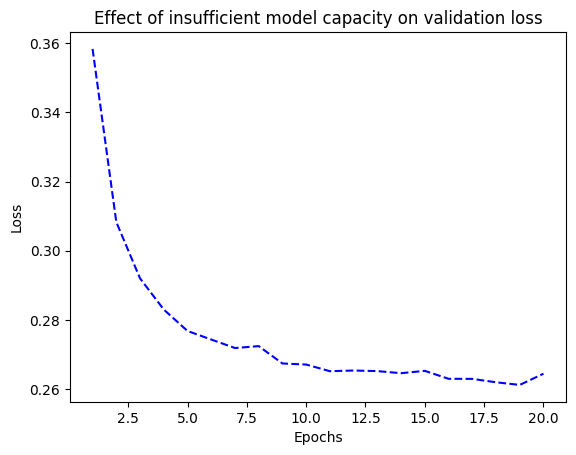

In [12]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss, 'b--',label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Model can't overfit, likely a problem with the representational power of the model, you need a bigger one, with more capacity, able to store more information.
Can increase representational power by adding more layers, using bigger layers(more params) or using kinds of layers more appropriate for the problem.

In [13]:
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_large_model = model.fit(train_images, train_labels, epochs= 20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 4s 7ms/step - loss: 0.3663 - accuracy: 0.8962 - val_loss: 0.2085 - val_accuracy: 0.9403
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1633 - accuracy: 0.9525 - val_loss: 0.1403 - val_accuracy: 0.9570
Epoch 3/20
375/375 [==============================] - 2s 7ms/step - loss: 0.1150 - accuracy: 0.9656 - val_loss: 0.1118 - val_accuracy: 0.9667
Epoch 4/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0880 - accuracy: 0.9741 - val_loss: 0.0982 - val_accuracy: 0.9688
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0712 - accuracy: 0.9786 - val_loss: 0.1082 - val_accuracy: 0.9691
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.0919 - val_accuracy: 0.9737
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.1068 - val_accuracy: 0.9688
Epoch

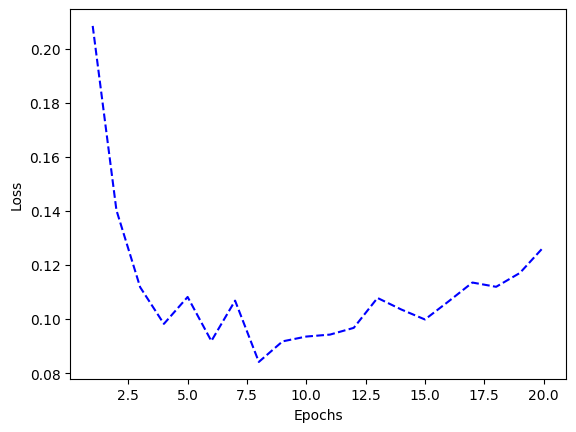

In [14]:
import matplotlib.pyplot as plt

val_loss = history_large_model.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss, 'b--',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Improve Generalization
##Dataset curation
Generalization in deep learning originates from latent structure of the data. If your data makes it possible to smoothly interpolate between samples it is possible to train a deep learning model that generalizes.
If the problem is overly noisy or discrete data, deep learning cannot help you.
It is essential to make sure you are working with an appropriate dataset.

1. Make sure to have enough data. Remember you need a dense sampling of the input-cross-output space. More data yield a better model. Sometimes, problems that seem impossible become solvable with a larger dataset.
2. Minimize labeling errors-visualize the inputs and check for anomalies and proofread labels
3. Clean the data and deal with missing values
4. If you have many features and aren't sure which ones are useful, do feature selection.

Particular important way to improve generalization is feature engineering.

##Feature Engineering
process of using knowledge about the data and about the machine learning algorithm at hand to make the algorithm work better by applying hardcoded transformations to the data.

##Use early stopping
Deep learning, use models that are vastly overparameterized, they have more degrees of freedom than the minimum necessary to fit to the latent manifold of the data. This is not an issue, because you never fully fit a deep learning model. You always interrupt training long before you reached the minimum possible training loss.


##Regularize your model

Set of best practices actively impeding the model's ability to fit perfectly to the training data, the goal is to make the model perfome better during validation. This is called "regularizing" the model, because it tends to make the model simpler, more "regular", its curve smoother, more "generic".
Less specific to the training set and better able to generalize by more closely approxiamting the latent manifold of the data.

###Reduce the network size
Simplest way to reduce overfitting is to reduce the size of the model. If the model has limited memorization resources, it won't be able to simply momorize its training data. Thus, to minimize its loss, it will have to resort ot learning compressed representations we're interested in. Compromize between too much capacity and not enough.
No formula, you must evaluate an array of different architectures in order to find the correct model size for your data.
The general workflow is to start with relatively few layers and parameters and increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss.

In [30]:
#Original model

from keras.datasets import imdb
from keras import layers
import numpy as np
import keras

(train_data,train_labels), _  = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results
train_data = vectorize_sequences(train_data)
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 86ms/step - loss: 0.5434 - accuracy: 0.7807 - val_loss: 0.4208 - val_accuracy: 0.8561
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3429 - accuracy: 0.8904 - val_loss: 0.3330 - val_accuracy: 0.8740
Epoch 3/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2544 - accuracy: 0.9188 - val_loss: 0.3039 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2053 - accuracy: 0.9297 - val_loss: 0.2792 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1725 - accuracy: 0.9426 - val_loss: 0.2762 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1509 - accuracy: 0.9492 - val_loss: 0.2998 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1257 - accuracy: 0.9615 - val_loss: 0.2919 - val_accuracy: 0.8858
Epoch 8/20
30

In [19]:
#Lower Capacity version

model = keras.Sequential([
    layers.Dense(4,activation='relu'),
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_lower_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 115ms/step - loss: 0.6424 - accuracy: 0.6142 - val_loss: 0.5964 - val_accuracy: 0.7080
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5603 - accuracy: 0.7501 - val_loss: 0.5447 - val_accuracy: 0.7911
Epoch 3/20
30/30 [==============================] - 2s 71ms/step - loss: 0.5074 - accuracy: 0.8240 - val_loss: 0.5089 - val_accuracy: 0.8238
Epoch 4/20
30/30 [==============================] - 2s 71ms/step - loss: 0.4664 - accuracy: 0.8681 - val_loss: 0.4816 - val_accuracy: 0.8497
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4321 - accuracy: 0.8911 - val_loss: 0.4587 - val_accuracy: 0.8711
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4021 - accuracy: 0.9109 - val_loss: 0.4445 - val_accuracy: 0.8632
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3747 - accuracy: 0.9259 - val_loss: 0.4287 - val_accuracy: 0.8686
Epoch 8/20
3

In [20]:
#Version with higher capacity

model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(512, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history_larger_model = model.fit(
train_data, train_labels,
epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 23s 744ms/step - loss: 0.5599 - accuracy: 0.7171 - val_loss: 0.3411 - val_accuracy: 0.8621
Epoch 2/20
30/30 [==============================] - 17s 574ms/step - loss: 0.3301 - accuracy: 0.8656 - val_loss: 0.2751 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 14s 478ms/step - loss: 0.2490 - accuracy: 0.9013 - val_loss: 0.2684 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 11s 379ms/step - loss: 0.1872 - accuracy: 0.9268 - val_loss: 0.2710 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 11s 383ms/step - loss: 0.1490 - accuracy: 0.9445 - val_loss: 0.3080 - val_accuracy: 0.8795
Epoch 6/20
30/30 [==============================] - 14s 473ms/step - loss: 0.1020 - accuracy: 0.9640 - val_loss: 0.3534 - val_accuracy: 0.8742
Epoch 7/20
30/30 [==============================] - 11s 380ms/step - loss: 0.0815 - accuracy: 0.9729 - val_loss: 0.3641 - val_accuracy: 0.8861

###Weight Regularization
Principle of Occam's Razor: given two explanations for something, the one most likely to be correct is the simplest one, the one that makes fewer assumptions.
This idea applies to the models learned by neural networks: given some training data and a network architecture, multiple sets of weight values could explain the data. Simpler models are less likely to overfit than complex ones.
A simple model is a model where the distribution of parameter values has less entropy (or one with fewer parameters).
A common way to mitigate overfitting is to put constraints on the complexity of a model by forcing its weights to take only small values, which makes the distribution of weight values more regular.
This is called weight regularization and is done by adding to the loss function of the model a cost associated with having large weights.


*   L1 regularization: Cost added is proportional to the absolute value of the weight coefficients (L1 norm of the weights)
*   L2 regularization: Cost added is proportional to the square of the value of the weight coefficients (L2 norm of the weights). Also called weight decay in the context of neural networks. Weight decay is mathematically the same as L2 regularization.

In Keras, weight regularization is added by passing weight regularizer instances to layers as keywords arguments.



In [21]:
#L2 weight regularization to the model

from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_l2_reg=model.fit(train_data,train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 108ms/step - loss: 0.6580 - accuracy: 0.7596 - val_loss: 0.5264 - val_accuracy: 0.8528
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.4587 - accuracy: 0.8735 - val_loss: 0.4329 - val_accuracy: 0.8669
Epoch 3/20
30/30 [==============================] - 2s 64ms/step - loss: 0.3712 - accuracy: 0.8981 - val_loss: 0.3887 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.3270 - accuracy: 0.9134 - val_loss: 0.3780 - val_accuracy: 0.8773
Epoch 5/20
30/30 [==============================] - 2s 68ms/step - loss: 0.2984 - accuracy: 0.9231 - val_loss: 0.3576 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2779 - accuracy: 0.9291 - val_loss: 0.3593 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 2s 79ms/step - loss: 0.2668 - accuracy: 0.9349 - val_loss: 0.3749 - val_accuracy: 0.8771
Epoch 8/20
3

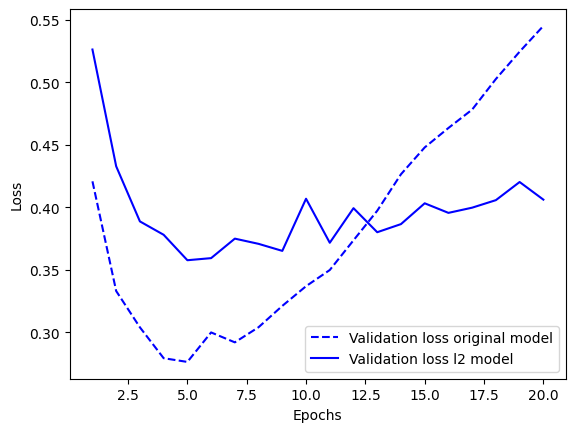

In [31]:
import matplotlib.pyplot as plt

val_loss = history_original.history['val_loss']
val_loss_l2 = history_l2_reg.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss, 'b--',label='Validation loss original model')
plt.plot(epochs, val_loss_l2, 'b-',label='Validation loss l2 model')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [25]:
#Alternative to L2 regularization

from tensorflow.keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001,l2=0.001)

###Adding Dropout
Dropout is one of the most effective and commonly used regularization techniques for neural networks. Dropout applied to a layers, consists of randomly dropping out(setting to zero) a number of output features of the layer during training.

In [23]:
#Adding dropout to the IMDB model

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history_dropout = model.fit(train_data,train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.6237 - accuracy: 0.6495 - val_loss: 0.4888 - val_accuracy: 0.8377
Epoch 2/20
30/30 [==============================] - 2s 73ms/step - loss: 0.4909 - accuracy: 0.7857 - val_loss: 0.3849 - val_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.4034 - accuracy: 0.8386 - val_loss: 0.3169 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3451 - accuracy: 0.8719 - val_loss: 0.3007 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3015 - accuracy: 0.8905 - val_loss: 0.2788 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2640 - accuracy: 0.9071 - val_loss: 0.2799 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2330 - accuracy: 0.9215 - val_loss: 0.2807 - val_accuracy: 0.8896
Epoch 8/20
30

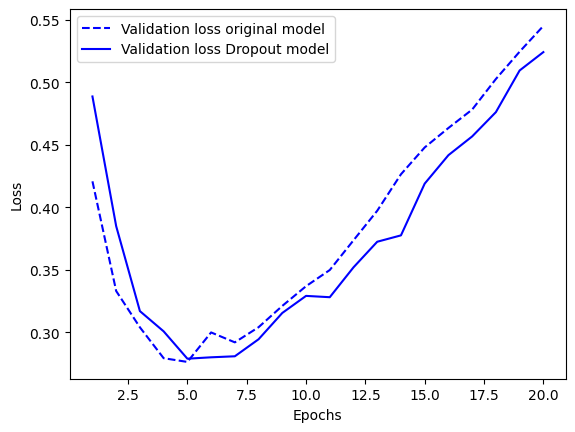

In [32]:
import matplotlib.pyplot as plt

val_loss = history_original.history['val_loss']
val_loss_dropout = history_dropout.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss, 'b--',label='Validation loss original model')
plt.plot(epochs, val_loss_dropout, 'b-',label='Validation loss Dropout model')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Recap
Most common ways to maximise generalization and prevent overfitting in Neural Networks are:


1.   Get more training data, or better training data
2.   Develop better features
3.   Reduce capacity of the model
4.   Add weight regularization (for smaller models).
5.   Add dropout

